# Import Libararies

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
import os
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Define paths

In [3]:
data_dir = "C:\AJMAL\Bone Fracture\Bone_Fracture_Binary_Classification\Bone_Fracture_Binary_Classification"

for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(("jpg", "jpeg", "png")):
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Check for corruption
            except (IOError, OSError):
                print(f"Corrupted file detected: {file_path}")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Pc\AppData\Local\Temp\ipykernel_14248\3853421177.py:1: SyntaxWarning: invalid escape sequence '\A'
  data_dir = "C:\AJMAL\Bone Fracture\Bone_Fracture_Binary_Classification\Bone_Fracture_Binary_Classification"


In [8]:
train_dir = r"C:\AJMAL\Bone Fracture\Bone_Fracture_Binary_Classification\Bone_Fracture_Binary_Classification\train"
val_dir = r"C:\AJMAL\Bone Fracture\Bone_Fracture_Binary_Classification\Bone_Fracture_Binary_Classification\val"
test_dir=r"C:\AJMAL\Bone Fracture\Bone_Fracture_Binary_Classification\Bone_Fracture_Binary_Classification\test"

# Image Data Generators (Augmentation)

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
# rescale=1./255: Normalizes pixel values (0-255 → 0-1).

# Load images

In [10]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode="binary")
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(150, 150), batch_size=32, class_mode="binary")
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode="binary")

Found 9246 images belonging to 2 classes.
Found 829 images belonging to 2 classes.
Found 506 images belonging to 2 classes.


# Show image

In [ ]:
import matplotlib.pyplot as plt
def show_images(data_generator, class_names, title):

    plt.figure(figsize=(16, 8))

    # Get a batch of images and labels
    images, labels = next(data_generator)  # Fetch a batch from the generator

    # Display the first 6 images
    for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i], cmap='gray')

        # Convert label to integer for indexing
        plt.title(class_names[int(labels[i])])  # Map label to class name
        plt.axis('off')

    plt.suptitle(title)
    plt.show()

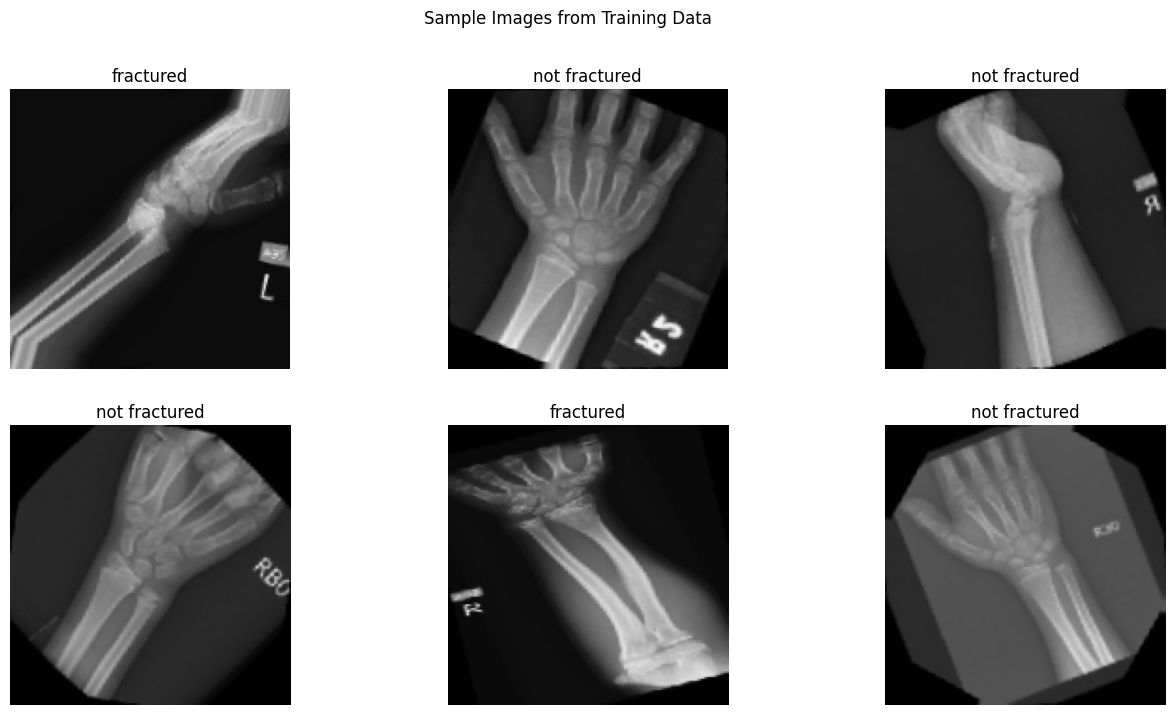

In [12]:
train_class_names = list(train_generator.class_indices.keys())
show_images(train_generator, train_class_names, title='Sample Images from Training Data')

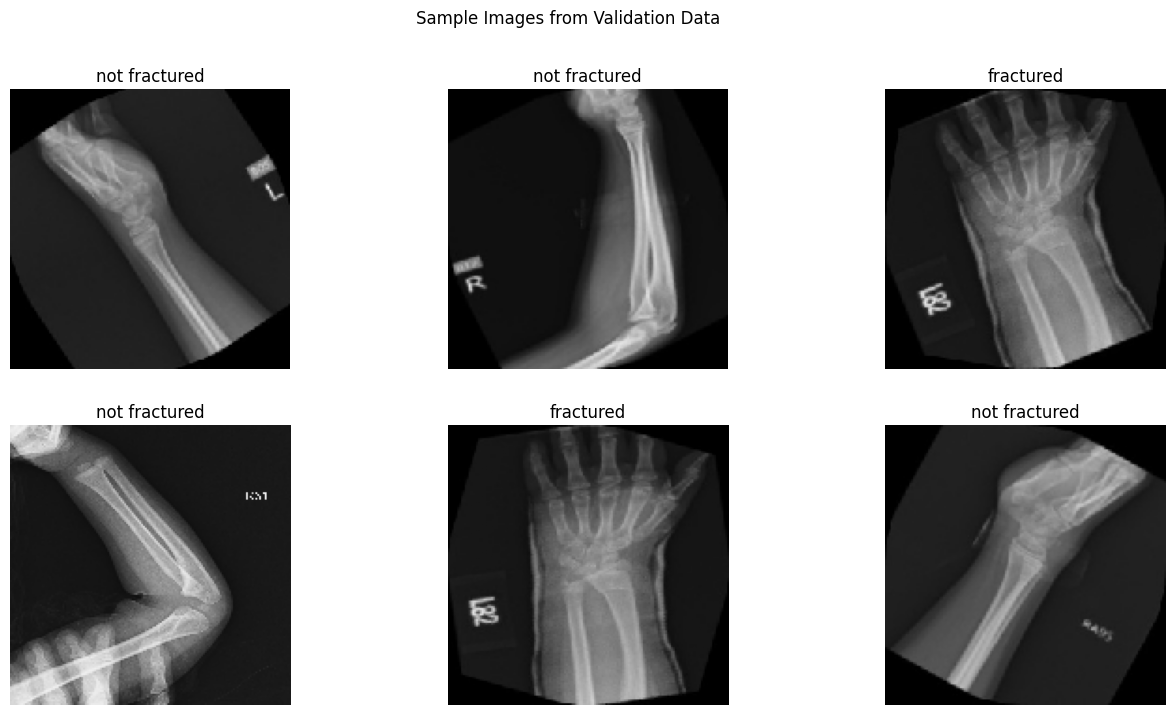

In [13]:
val_class_names = list(val_generator.class_indices.keys())
show_images(val_generator, val_class_names, title='Sample Images from Validation Data')

In [14]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

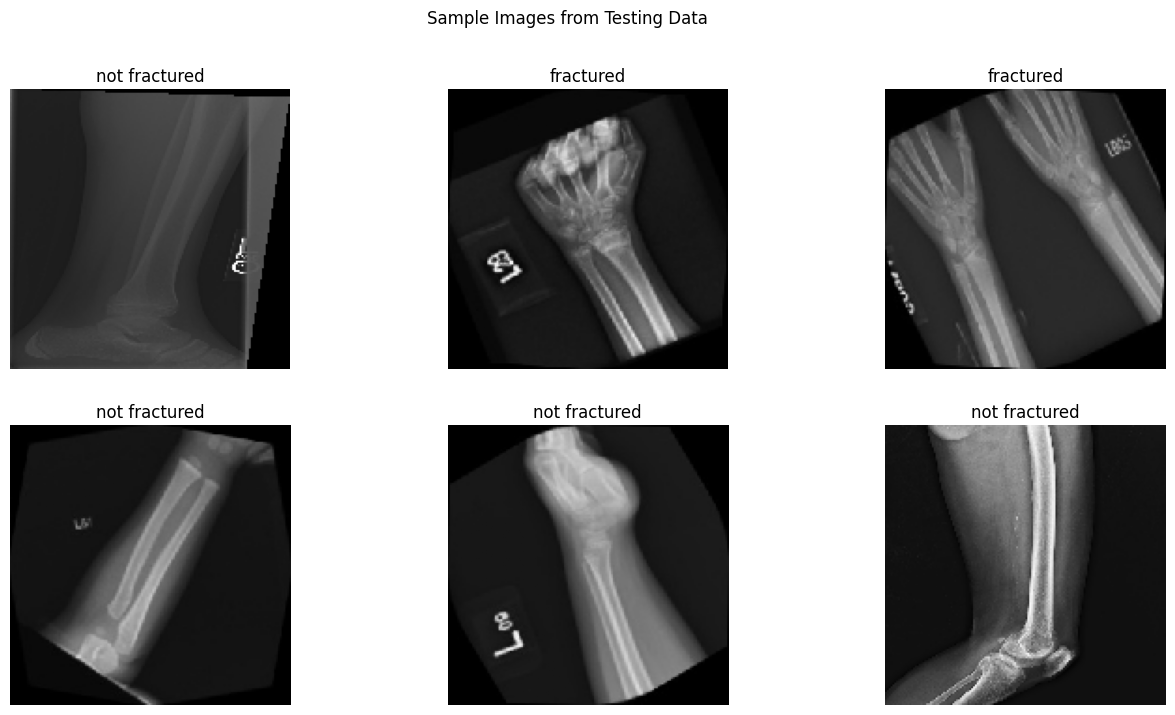

In [15]:
test_class_names = list(test_generator.class_indices.keys())
show_images(test_generator, test_class_names, title='Sample Images from Testing Data')

# Define CNN Model

In [40]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (fractured vs. not fractured)
])

c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# model2 = Sequential([
#     Conv2D(32, (3, 3), activation='relu',
#            kernel_initializer='he_normal',
#            input_shape=(150, 150, 3)),

#     BatchNormalization(),
    
#     MaxPooling2D((2, 2)),
    
#     Conv2D(64, (3, 3), activation='relu',
#            kernel_initializer='he_normal'),
    
#     Dropout(0.2),

#     MaxPooling2D((2, 2)),

#     Conv2D(128, (3, 3), activation='relu',
#            padding='same', strides=1,
#            kernel_initializer='he_normal'),

#     BatchNormalization(),
    
#     MaxPooling2D((3, 3)),

#     Flatten(),
    
#     Dense(256, activation='relu',
#           kernel_initializer='he_normal',
#           kernel_regularizer=regularizers.l2(0.01)),  
    
#     Dropout(0.3),
    
#     Dense(128, activation='relu',
#           kernel_initializer='he_normal',
#           kernel_regularizer=regularizers.l2(0.01)),  

#     Dropout(0.5),

#     Dense(1, activation='sigmoid')
# ])

# Compile model

In [ ]:
# optimizer = Adam(learning_rate=0.001)

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# optimizer = Adam(learning_rate=0.00009)
# model2.compile(optimizer=optimizer,
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# Train model

In [42]:
model.fit(train_generator, validation_data=val_generator, epochs=30)

Epoch 1/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.6862 - loss: 0.5990

c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


289/289 ━━━━━━━━━━━━━━━━━━━━ 127s 435ms/step - accuracy: 0.6865 - loss: 0.5985 - val_accuracy: 0.8492 - val_loss: 0.4321
Epoch 2/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 111s 383ms/step - accuracy: 0.8984 - loss: 0.2579 - val_accuracy: 0.9035 - val_loss: 0.2552
Epoch 3/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 108s 375ms/step - accuracy: 0.9530 - loss: 0.1353 - val_accuracy: 0.9192 - val_loss: 0.2348
Epoch 4/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 112s 386ms/step - accuracy: 0.9673 - loss: 0.0954 - val_accuracy: 0.9337 - val_loss: 0.1878
Epoch 5/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 110s 379ms/step - accuracy: 0.9785 - loss: 0.0650 - val_accuracy: 0.9433 - val_loss: 0.1766
Epoch 6/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 114s 395ms/step - accuracy: 0.9787 - loss: 0.0650 - val_accuracy: 0.9312 - val_loss: 0.1899
Epoch 7/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 113s 390ms/step - accuracy: 0.9831 - loss: 0.0468 - val_accuracy: 0.9614 - val_loss: 0.1318
Epoch 8/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 107s 370ms/step - accuracy: 0.9883 - loss: 0.03

In [20]:
# History = model2.fit(train_generator, validation_data=val_generator, epochs=30)

# Save model

In [45]:
model.save("Bone_Fracture_Classifier.h5")
print("✅ Model training complete and saved!")

✅ Model training complete and saved!


In [22]:
# model2.save("Bone_fracture_classifier2.h5")
# print("✅ Model training complete and saved!")

# .

In [35]:
model = tf.keras.models.load_model("Bone_Fracture_Classifier.h5")

In [41]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.9900 - loss: 0.0211
Test Accuracy: 0.99
Test Loss: 0.03


In [25]:
# Results=pd.DataFrame(model.history)
# Results.plot()

# Prediction

In [28]:
# Load and preprocess test image
img_path = r"C:\Users\Pc\Downloads\An-anterior-view-of-right-wrist-x-ray-shows-no-fracture.png"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img_array)
prediction

if prediction > 0.5:
   print("Not Fractured")
else:
   print("Fractured")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Not Fractured


In [ ]:
# predictions = model.predict(test_generator)
# predicted_classes = (predictions > 0.5).astype(int)

# # Get true labels
# true_classes = test_generator.classes

# report = classification_report(true_classes, predicted_classes, target_names=list(test_generator.class_indices.keys()))
# print(report)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step
               precision    recall  f1-score   support

    fractured       0.48      0.48      0.48       238
not fractured       0.54      0.53      0.54       268

     accuracy                           0.51       506
    macro avg       0.51      0.51      0.51       506
 weighted avg       0.51      0.51      0.51       506

